<a href="https://colab.research.google.com/github/ValdazoAmerico/sentiment-analysis-tfidf/blob/main/sentiment_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pickle
import sys
import os
import io
import re
from sys import path
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [5]:
amazon = pd.read_csv('amazon_cells_labeled.txt',delimiter='\t',header=None)
amazon.columns = ['Sentence','Class']

In [6]:
amazon.head()

,Sentence,Class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
yelp = pd.read_csv('yelp_labelled.txt',delimiter='\t',header=None)
yelp.columns = ['Sentence','Class']

In [9]:
yelp.head()

,Sentence,Class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
imdb = pd.read_csv('imdb_labelled.txt',delimiter='\t', header=None)
imdb.columns = ['Sentence', 'Class']

In [11]:
imdb.head()

,Sentence,Class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
data = pd.DataFrame()

In [13]:
data = pd.concat([amazon, yelp, imdb])
data['index'] = data.index
print(data)

                                              Sentence  Class  index
0    So there is no way for me to plug it in here i...      0      0
1                          Good case, Excellent value.      1      1
2                               Great for the jawbone.      1      2
3    Tied to charger for conversations lasting more...      0      3
4                                    The mic is great.      1      4
..                                                 ...    ...    ...
743  I just got bored watching Jessice Lange take h...      0    743
744  Unfortunately, any virtue in this film's produ...      0    744
745                   In a word, it is embarrassing.        0    745
746                               Exceptionally bad!        0    746
747  All in all its an insult to one's intelligence...      0    747

[2748 rows x 3 columns]


   Class  COUNT
0      0    846
1      1    827


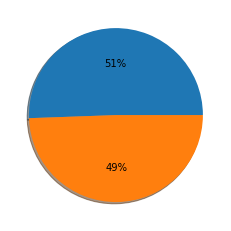

In [14]:
pd.set_option('display.width',4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index',ascending=False)
distOfDetails.columns = ['Class','COUNT']
print(distOfDetails)

plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%', shadow=True, startangle=360)
plt.show()


In [20]:
columns = ['index', 'Class','Sentence']
df_ = pd.DataFrame(columns=columns)

data['Sentence'] = data['Sentence'].str.lower()

for index, row in data.iterrows():
  word_tokens = word_tokenize(row['Sentence'])
  filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
  df_ = df_.append({'index': row['index'], 'Class': row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)
data = df_
print("data", data)

X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'), test_size=0.10, random_state=0)
classes = data['Class'].unique()


data      index Class                                           Sentence
0        0     0                  way plug us unless go converter .
1        1     1                      good case , excellent value .
2        2     1                                    great jawbone .
3        3     0  tied charger conversations lasting 45 minutes....
4        4     1                                        mic great .
...    ...   ...                                                ...
2743   743     0    got bored watching jessice lange take clothes !
2744   744     0  unfortunately , virtue film 's production work...
2745   745     0                              word , embarrassing .
2746   746     0                                exceptionally bad !
2747   747     0      insult one 's intelligence huge waste money .

[2748 rows x 3 columns]


In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True,norm='l2')
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05, max_iter=50,penalty='elasticnet')
target = y_train
classifier = classifier.fit(counts, target)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test,predictions,average=None,labels=classes)
print("model accuracy:%.2f"%acc)
print(classification_report(y_test,predictions))

model accuracy:0.81
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       139
           1       0.82      0.78      0.80       136

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275

